<a href="https://colab.research.google.com/github/Prajwal-ak-0/AI/blob/master/1_Neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Tensorflow for Neural Network Regression

### Key Steps:

1. **Data Preparation:** Begin by preparing your dataset.
   
2. **Model Initialization:** Configure the model by defining the input layer, hidden layers, number of nodes in each hidden layer, and output layer shape.

3. **Model Compilation:** Specify the loss function, optimizer, and evaluation metrics to train the model effectively.

4. **Result Visualization:** Visualize the outcomes to gain insights and assess model performance.

5. **Model Saving and Deployment:** Save your trained model for future use and deploy it in production environments seamlessly.

### Hyperparameters:
Hyperparameters are like dials that control how a model learns. By setting them right, we can make sure the model learns effectively without memorizing the data. It's like finding the perfect balance for the model to do its best. Some of them are as follows :


1.   Input layer Shape
2.   Hidden layer
3.   Neurons per hidden layer
4.   Output layer shape.
5.   Hidden Activation
6.   Output activation
7.   Loss function
8.   Optimizer


In [170]:
import tensorflow as tf
print(tf.__version__)

2.15.0


### Creating custom sample data, view and fix it.

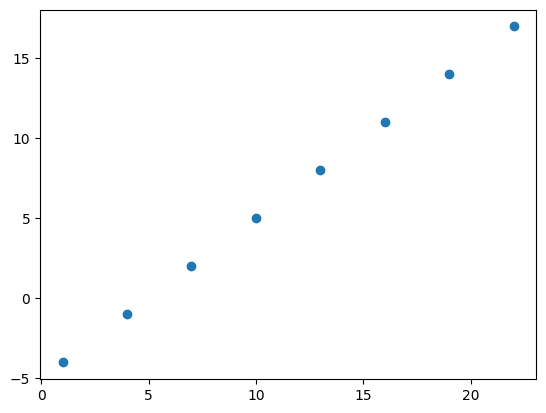

In [171]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,4,7,10,13,16,19,22])
y = np.array([-4,-1, 2,5,8,11,14,17])
plt.scatter(X,y)

In [172]:
tf.random.set_seed(10)
model = tf.keras.Sequential(layers=[tf.keras.layers.Dense(10),tf.keras.layers.Dense(10),tf.keras.layers.Dense(10),tf.keras.layers.Dense(10),tf.keras.layers.Dense(10) ])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 835ms/step - loss: 9.1136 - mae: 9.1136
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 7.7536 - mae: 7.7536
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 6.7723 - mae: 6.7723
Epoch 4/500
1/1 [==============================] - 0s 12ms/step - loss: 6.0795 - mae: 6.0795
Epoch 5/500
1/1 [==============================] - 0s 14ms/step - loss: 5.6338 - mae: 5.6338
Epoch 6/500
1/1 [==============================] - 0s 16ms/step - loss: 5.3278 - mae: 5.3278
Epoch 7/500
1/1 [==============================] - 0s 11ms/step - loss: 5.1095 - mae: 5.1095
Epoch 8/500
1/1 [==============================] - 0s 13ms/step - loss: 4.8962 - mae: 4.8962
Epoch 9/500
1/1 [==============================] - 0s 15ms/step - loss: 4.7028 - mae: 4.7028
Epoch 10/500
1/1 [==============================] - 0s 13ms/step - loss: 4.5095 - mae: 4.5095
Epoch 11/500
1/1 [==============================] - 0s 13ms/step - l

In [173]:
# Predict and prict when X = 25
y_pred = model.predict([25])
y_pred = np.mean(y_pred)
y_pred

1/1 [==============================] - 0s 139ms/step


13.334768

In [174]:
X = np.arange(-100, 100, 4)
y = np.arange(-90, 110, 4)

X,y, y == X+10

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  Tru

### Splitting into training set and test set and Visualizing

In [175]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

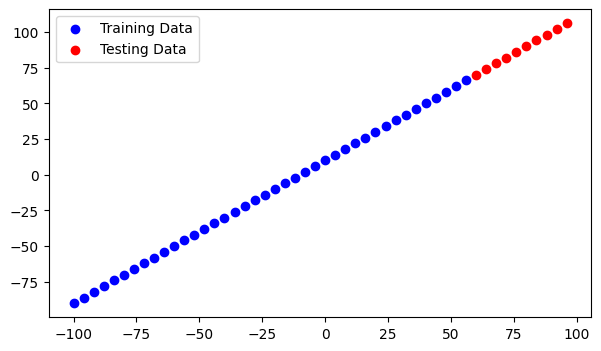

In [176]:
plt.figure(figsize=(7,4))

plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='r', label='Testing Data')

plt.legend()

In [177]:
tf.random.set_seed(10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.mae, metrics=["mae"])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                20        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
model.fit(tf.expand_dims(X_train, -1), y_train, epochs=200)
model.summary()

Epoch 1/200
2/2 [==============================] - 1s 11ms/step - loss: 54.6119 - mae: 54.6119
Epoch 2/200
2/2 [==============================] - 0s 7ms/step - loss: 43.6983 - mae: 43.6983
Epoch 3/200
2/2 [==============================] - 0s 7ms/step - loss: 24.2278 - mae: 24.2278
Epoch 4/200
2/2 [==============================] - 0s 7ms/step - loss: 7.5792 - mae: 7.5792
Epoch 5/200
2/2 [==============================] - 0s 7ms/step - loss: 23.0999 - mae: 23.0999
Epoch 6/200
2/2 [==============================] - 0s 7ms/step - loss: 20.2747 - mae: 20.2747
Epoch 7/200
2/2 [==============================] - 0s 6ms/step - loss: 38.8525 - mae: 38.8525
Epoch 8/200
2/2 [==============================] - 0s 7ms/step - loss: 30.1724 - mae: 30.1724
Epoch 9/200
2/2 [==============================] - 0s 7ms/step - loss: 27.0073 - mae: 27.0073
Epoch 10/200
2/2 [==============================] - 0s 6ms/step - loss: 27.3851 - mae: 27.3851
Epoch 11/200
2/2 [==============================] - 0s 6ms/s

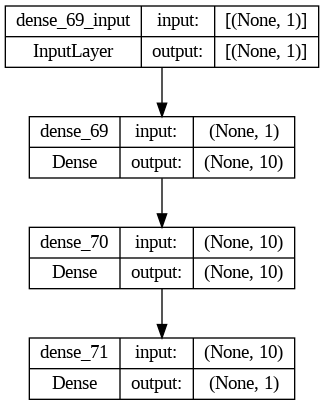

In [179]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

1/1 [==============================] - 0s 75ms/step


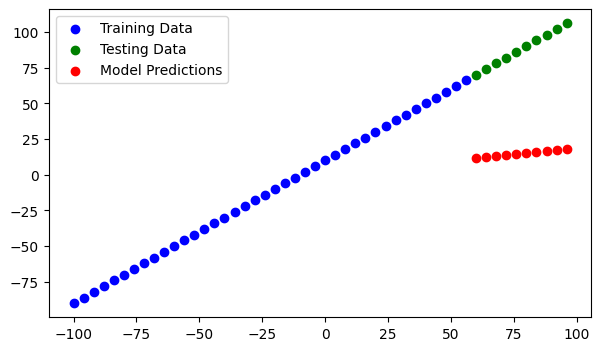

In [180]:
y_pred = model.predict(X_test)

plt.figure(figsize=(7,4))
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Testing Data')
plt.scatter(X_test, y_pred, c='r', label='Model Predictions')
plt.legend()
plt.show()

In [181]:
model.evaluate(X_test, y_test), tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)

1/1 [==============================] - 0s 181ms/step - loss: 73.0778 - mae: 73.0778


([73.07778930664062, 73.07778930664062],
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([76.153824, 75.47026 , 74.7867  , 74.103134, 73.41957 , 72.73601 ,
        72.05244 , 71.36887 , 70.68531 , 70.00175 ], dtype=float32)>)

In [182]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae, y_test.shape, y_pred.shape

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([76.153824, 75.47026 , 74.7867  , 74.103134, 73.41957 , 72.73601 ,
        72.05244 , 71.36887 , 70.68531 , 70.00175 ], dtype=float32)>,
 (10,),
 (10, 1))

In [183]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=73.07779>

### Saving and Loading a Model

This has two formats
1). SavedModel Format (Default)
2). HDF5 Format

In [184]:
model.save('my_model')

In [185]:
!ls my_model

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


In [186]:
loaded_model = tf.keras.models.load_model('my_model')
loaded_model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 10)                20        
                                                                 
 dense_70 (Dense)            (None, 10)                110       
                                                                 
 dense_71 (Dense)            (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [187]:
from google.colab import files
files.download('my_model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Project 1

In [188]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [189]:
insurance_dataset = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')

In [190]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [191]:
one_hot_encoded_insurance = pd.get_dummies(insurance_dataset)
one_hot_encoded_insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [192]:
# axis = 1, removes entire column whereas axis = 0(Default) removes enitre row.
X = one_hot_encoded_insurance.drop("charges", axis=1)
y = one_hot_encoded_insurance["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [193]:
y.head(), y.dtype

(0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64,
 dtype('float64'))

In [194]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [195]:
tf.random.set_seed(42)

# Build the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss='mae',
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=['mae'])

In [196]:
# Early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Train the model
history = insurance_model.fit(X_train, y_train, epochs=1000,
                              validation_split=0.2,
                              callbacks=[early_stopping])

Epoch 1/1000
27/27 [==============================] - 1s 10ms/step - loss: 13517.5654 - mae: 13517.5654 - val_loss: 12652.4512 - val_mae: 12652.4512
Epoch 2/1000
27/27 [==============================] - 0s 5ms/step - loss: 13511.0654 - mae: 13511.0654 - val_loss: 12639.5195 - val_mae: 12639.5195
Epoch 3/1000
27/27 [==============================] - 0s 4ms/step - loss: 13485.2852 - mae: 13485.2852 - val_loss: 12592.3555 - val_mae: 12592.3555
Epoch 4/1000
27/27 [==============================] - 0s 5ms/step - loss: 13405.0586 - mae: 13405.0586 - val_loss: 12462.6924 - val_mae: 12462.6924
Epoch 5/1000
27/27 [==============================] - 0s 4ms/step - loss: 13208.3760 - mae: 13208.3760 - val_loss: 12173.8369 - val_mae: 12173.8369
Epoch 6/1000
27/27 [==============================] - 0s 5ms/step - loss: 12802.3408 - mae: 12802.3408 - val_loss: 11615.4043 - val_mae: 11615.4043
Epoch 7/1000
27/27 [==============================] - 0s 5ms/step - loss: 12065.7773 - mae: 12065.7773 - val_lo

9/9 [==============================] - 0s 3ms/step - loss: 1536.5210 - mae: 1536.5210
Test MAE: 1536.52099609375


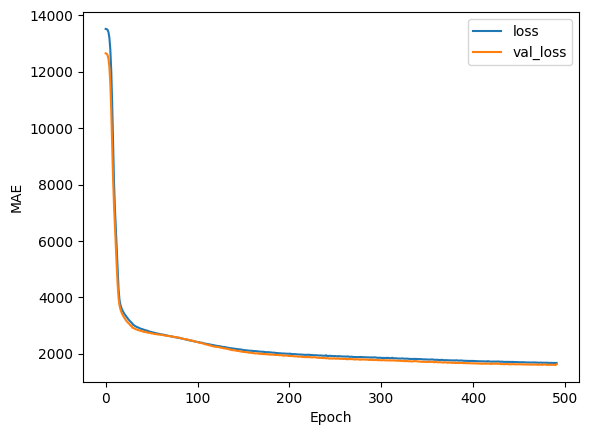

In [197]:
test_loss, test_mae = insurance_model.evaluate(X_test, y_test)
print(f'Test MAE: {test_mae}')

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [200]:
y_pred = insurance_model.predict(X_test).flatten()

y_test_np = y_test.to_numpy()

allowed_variation = 0.1 * y_test_np

correct_predictions = np.abs(y_test_np - y_pred) <= allowed_variation

accuracy = np.mean(correct_predictions) * 100

print(f'Accuracy with 10% Variation: {accuracy:.2f}%')

9/9 [==============================] - 0s 2ms/step
Accuracy with 10% Variation: 87.31%
